In [39]:
%matplotlib inline
from pylab import *

import shutil
import sys
import os.path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import minimize
import itertools
import pyomo.environ as env
import ast
from pyomo.environ import *
#solver = env.SolverFactory("ipopt")

In [44]:
for net_profit_change in range(0, 40):
    model = ConcreteModel()

    # declare decision variables
    model.x = Var(domain=NonNegativeReals)
    
    # declare objective
    model.profit = Objective(
        expr = (40-net_profit_change)*model.x,
        sense = maximize)

    # declare constraints
    model.demand = Constraint(expr = model.x <= 40)
    model.laborA = Constraint(expr = model.x <= 80)
    model.laborB = Constraint(expr = 2*model.x <= 100)

    # solve
    SolverFactory('cbc').solve(model) #.write()

    print("Profit = ", model.profit(), " per week")
    print("X = ", model.x(), " units per week")
    
    if model.profit() < 0: break
    

Profit =  1600.0  per week
X =  40.0  units per week
Profit =  1560.0  per week
X =  40.0  units per week
Profit =  1520.0  per week
X =  40.0  units per week
Profit =  1480.0  per week
X =  40.0  units per week
Profit =  1440.0  per week
X =  40.0  units per week
Profit =  1400.0  per week
X =  40.0  units per week
Profit =  1360.0  per week
X =  40.0  units per week
Profit =  1320.0  per week
X =  40.0  units per week
Profit =  1280.0  per week
X =  40.0  units per week
Profit =  1240.0  per week
X =  40.0  units per week
Profit =  1200.0  per week
X =  40.0  units per week
Profit =  1160.0  per week
X =  40.0  units per week
Profit =  1120.0  per week
X =  40.0  units per week
Profit =  1080.0  per week
X =  40.0  units per week
Profit =  1040.0  per week
X =  40.0  units per week
Profit =  1000.0  per week
X =  40.0  units per week
Profit =  960.0  per week
X =  40.0  units per week
Profit =  920.0  per week
X =  40.0  units per week
Profit =  880.0  per week
X =  40.0  units per w

In [42]:
print("Profit = ", model.profit(), " per week")
print("X = ", model.x(), " units per week")

Profit =  1600.0  per week
X =  40.0  units per week


In [46]:
# iterative1.py
import pyomo.environ as pyo
from pyomo.opt import SolverFactory



In [61]:
# problem parameters
T = 5        # planning period from 1..T
M = 3         # length of maintenance period
P = 4         # number of maintenance periods

# daily profits
c = {k:np.random.uniform() for k in range(1, T+1)}

In [62]:
c

{1: 0.21715178682179137,
 2: 0.8869767750801094,
 3: 0.5910022842519581,
 4: 0.7660462099477517,
 5: 0.7273560562241846}

In [63]:
m = pyo.ConcreteModel()

m.T = pyo.RangeSet(1, T)
m.Y = pyo.RangeSet(1, T - M + 1)
m.S = pyo.RangeSet(0, M - 1)

m.c = pyo.Param(m.T, initialize = c)
m.x = pyo.Var(m.T, domain=pyo.Binary)
m.y = pyo.Var(m.T, domain=pyo.Binary)

# objective
m.profit = pyo.Objective(expr = sum(m.c[t]*m.x[t] for t in m.T), sense=pyo.maximize)

# required number P of maintenance starts
m.sumy = pyo.Constraint(expr = sum(m.y[t] for t in m.Y) == P)

# no more than one maintenance start in the period of length M
m.sprd = pyo.Constraint(m.Y, rule = lambda m, t: sum(m.y[t+s] for s in m.S) <= 1)

# disjunctive constraints
m.bigm = pyo.Constraint(m.Y, rule = lambda m, t: sum(m.x[t+s] for s in m.S) <= M*(1 - m.y[t]))
    

   
#m = maintenance_planning_bigm(c, T, M, P)
pyo.SolverFactory('cbc').solve(m).write()

/Users/amiara/miniconda3/envs/water-hubv2/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  if sys.path[0] == '':
/Users/amiara/miniconda3/envs/water-hubv2/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  from ipykernel import kernelapp as app
/Users/amiara/miniconda3/envs/water-hubv2/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


    model=unknown;
        message from solver=<undefined>
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -inf
  Upper bound: None
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 11
  Number of binary variables: 10
  Number of integer variables: 10
  Number of nonzeros: 5
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  User time: -1.0
  System time: 0.02
  Wallclock time: 0.02
  Termination condition: infeasible
  Termination message: Model was proven to be infeasible.
  Statistics: 
    Branch and b

In [59]:
print({j: pyo.value(m.x[j]) for j in m.T})

{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 29: 1.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 1.0, 34: 1.0, 35: 1.0, 36: 1.0, 37: 1.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 1.0, 42: 1.0, 43: 1.0, 44: 1.0, 45: 1.0, 46: 1.0, 47: 1.0, 48: 1.0, 49: 1.0, 50: 1.0, 51: 1.0, 52: 1.0, 53: 1.0, 54: 1.0, 55: 1.0, 56: 0.0, 57: 0.0, 58: 0.0, 59: 0.0, 60: 0.0, 61: 0.0, 62: 1.0, 63: 1.0, 64: 1.0, 65: 1.0, 66: 1.0, 67: 1.0, 68: 1.0, 69: 1.0, 70: 1.0, 71: 1.0, 72: 1.0, 73: 1.0, 74: 1.0, 75: 1.0, 76: 1.0, 77: 1.0, 78: 1.0, 79: 1.0, 80: 1.0, 81: 1.0, 82: 1.0, 83: 1.0, 84: 1.0, 85: 1.0, 86: 1.0, 87: 1.0, 88: 1.0, 89: 1.0, 90: 1.0}


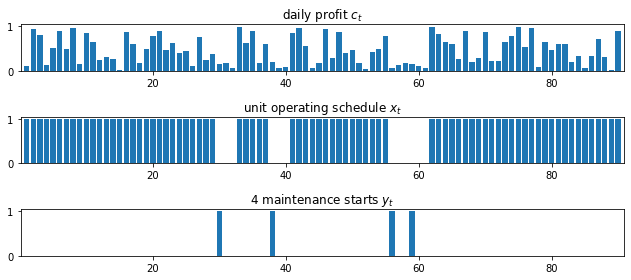

In [57]:
def plot_schedule(m):
    fig,ax = plt.subplots(3,1, figsize=(9,4))
    
    ax[0].bar(m.T, [m.c[t] for t in m.T])
    ax[0].set_title('daily profit $c_t$')
    
    ax[1].bar(m.T, [m.x[t]() for t in m.T], label='normal operation')
    ax[1].set_title('unit operating schedule $x_t$')
    
    ax[2].bar(m.Y, [m.y[t]() for t in m.Y])
    ax[2].set_title(str(P) + ' maintenance starts $y_t$')
    for a in ax:
        a.set_xlim(0.1, len(m.T)+0.9)
        
    plt.tight_layout()

plot_schedule(m)

In [64]:
v = {'hammer':8, 'wrench':3, 'screwdriver':6, 'towel':11}
w = {'hammer':5, 'wrench':7, 'screwdriver':4, 'towel':3}
limit = 14
model = ConcreteModel()
model.ITEMS = Set(initialize=v.keys())
model.x = Var(model.ITEMS, within=Binary)
model.value = Objective(expr=sum(v[i]*model.x[i] for i in model.ITEMS), sense=maximize)
model.weight = Constraint(expr=sum(w[i]*model.x[i] for i in model.ITEMS) <= limit)

/Users/amiara/miniconda3/envs/water-hubv2/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  
/Users/amiara/miniconda3/envs/water-hubv2/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  # Remove the CWD from sys.path while we load stuff.


In [73]:
env.SolverFactory('glpk').solve(m).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 11
  Number of nonzeros: 13
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: infeasible
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.053930044174194336


In [77]:
v w

SyntaxError: invalid syntax (<ipython-input-77-61e509d38cf3>, line 1)

In [78]:
model.dat

AttributeError: 'ConcreteModel' object has no attribute 'dat'